## Putting it together

One way we might get a more accurate idea of profound childhood obesity would be to look at individuals who were so severely obese that they underwent bariatric surgery. Table 10 in the spreadsheet details:

> Table 10: Finished Consultant Episodes with a primary diagnosis of obesity and a main or secondary procedure of 'Bariatric Surgery', by age group											

Use ```pandas``` to read in the spreadsheet. As above you'll have to supply the URL. Pull out the data on bariatric surgery and tidy it up. Create two plots side-by-side, one showing the trend for children (<16) and one showing the trend for 16-24 year olds. Do these trends look the same? What do you think this might say about youth obesity?

Hint: To carry out this task you'll need to load both ```pandas``` and ```requests```. Although we've used the ```subplot``` function in ```pyplot``` to draw figures side by side in this case we'll want to set up a proper figure object. In ```pyplot``` the [```figure```](http://matplotlib.org/api/figure_api.html#matplotlib.figure) (there's lots of documentation here!) function sets up a 'space' that will contain the elements of the figure (including subplots). For this task you'll want to set up a ```figure``` that is 8x4 inches using the [```figsize```](http://matplotlib.org/api/figure_api.html#matplotlib.figure.Figure) argument. Then you can use the ```subplots``` function to set up subplots as before. You might want to use the [```subplots_adjust```](http://matplotlib.org/api/figure_api.html#matplotlib.figure.Figure.subplots_adjust) function with the ```wspace``` argument set to make sure there is adequate spacing between your plots.

In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# so we can see plots in notebook
% matplotlib inline 

# define what we want to download
file_i_want = "https://files.digital.nhs.uk/publicationimport/pub23xxx/pub23742/obes-phys-acti-diet-eng-2017-tab.xlsx"
r = requests.get(file_i_want) # grab the file
# open file for writing
f_out = open('data/obesity_data.xlsx', 'wb')
# write the remote data 
f_out.write(r.content)
# close the new file
f_out.close()

# get the data into pandas
data = pd.ExcelFile('data/obesity_data.xlsx')
# sheet names
print(data.sheet_names)

['Contents', 'Table 1', 'Table 2', 'Table 3', 'Table 4', 'Table 5', 'Table 6', 'Table 7', 'Table 8', 'Table 9', 'Table 10', 'Table 11', 'Table 12', 'Table 13', 'Table 14']


In [2]:
# get sheet 10
data_age = data.parse('Table 10', skiprows=7, skipfooter=19) # skip unneccessary rows (check sheet)
data_age.head() # first few entries

,OPCS procedure codes,Unnamed: 1,"Year6,7,8",All persons9,Under 16,16 to 24,25 to 34,35 to 44,45 to 54,55 to 64,65 to 74,75 and over
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4.2,NaN,2005/06,1038.0,2.0,21.0,189.0,375.0,319.0,123.0,6.0,0.0
2,4.3,NaN,2006/07,1951.0,0.0,59.0,327.0,734.0,569.0,244.0,18.0,0.0
3,4.4,NaN,2007/08,2724.0,0.0,105.0,423.0,1034.0,793.0,343.0,23.0,1.0
4,4.4,NaN,2008/09,4221.0,2.0,143.0,652.0,1482.0,1306.0,583.0,51.0,0.0


In [3]:
# clean up and rename columns
data_age.dropna(axis = 0, how='all', inplace=True) # drop NaN rows
data_age.dropna(axis = 1, how='all', inplace=True) # drop NaN cols
data_age.head()
# rename cols
data_age.rename({'Year6,7,8':'Year', 'All persons9':'Total'}, axis='columns', inplace=True)
# drop OPCS procedure codes column
data_age.drop('OPCS procedure codes ', axis='columns', inplace=True) # note that extra space - really annoying, check with data_age.columns
# check
data_age.head()

,Year,Total,Under 16,16 to 24,25 to 34,35 to 44,45 to 54,55 to 64,65 to 74,75 and over
1,2005/06,1038.0,2.0,21.0,189.0,375.0,319.0,123.0,6.0,0.0
2,2006/07,1951.0,0.0,59.0,327.0,734.0,569.0,244.0,18.0,0.0
3,2007/08,2724.0,0.0,105.0,423.0,1034.0,793.0,343.0,23.0,1.0
4,2008/09,4221.0,2.0,143.0,652.0,1482.0,1306.0,583.0,51.0,0.0
5,2009/10,7214.0,1.0,205.0,1051.0,2458.0,2330.0,1025.0,143.0,0.0


In [4]:
# melt data
data_age_m = pd.melt(data_age, id_vars='Year', var_name='Group', value_name='Number')
data_age_m.head()
# set index to Year
#data_age_m.set_index('Year', inplace=True)

,Year,Group,Number
0,2005/06,Total,1038.0
1,2006/07,Total,1951.0
2,2007/08,Total,2724.0
3,2008/09,Total,4221.0
4,2009/10,Total,7214.0


In [5]:
# select the data we want
# use of isin 
youth_data = data_age_m[data_age_m['Group'].isin(['Under 16', '16 to 24'])]
youth_data.tail()

,Year,Group,Number
28,2011/12,16 to 24,225.0
29,2012/13,16 to 24,207.0
30,2013/14,16 to 24,198.0
31,2014/15,16 to 24,200.0
32,2015/16,16 to 24,198.0


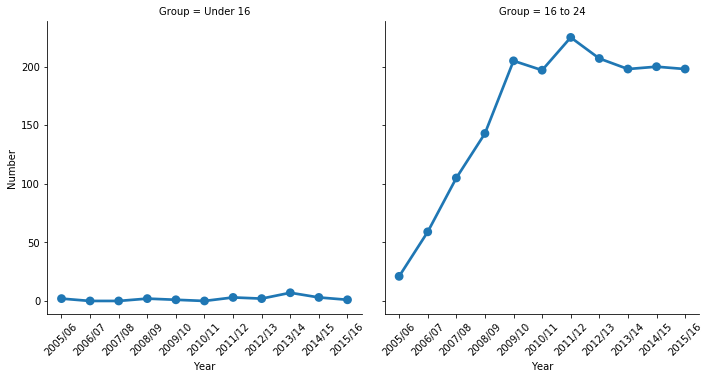

In [6]:
# seaborn catplot (category plot) creates a grid for us definedby col='...'
p = sns.catplot('Year', 'Number', col='Group', kind='point', data=youth_data)
p.set_xticklabels(rotation=45) # rotate tick labels for clarity
plt.show()

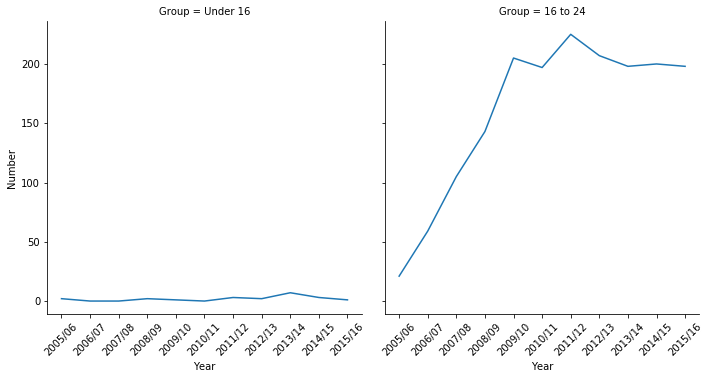

In [7]:
# or use FacetGrid & sns.lineplot
fct = sns.FacetGrid(data=youth_data, col='Group', height=5)
fct.map(sns.lineplot, 'Year', 'Number')
fct.set_xticklabels(rotation=45)
plt.show()

## Homework

The [DataDryad digital](http://datadryad.org/) repository provides an online location where researchers can deposit raw data for others to examine or re-analyse:
>DataDryad.org is a curated general-purpose repository that makes the data underlying scientific publications discoverable, freely reusable, and citable. Dryad has integrated data submission for a growing list of journals; submission of data from other publications is also welcome. 

In this homework exercise we will download a dataset on exercise training and fish (really!) and re-create a couple of the figures from the associated paper. In 2013 Sinclair et al published a paper in Functional Ecology that claimed: 
>Exercise changes behaviour and may thereby alter interactions between individuals and dispersal. Environmental changes that demand increased levels of exercise induce behavioural responses that are likely to increase the success of individuals under these changed conditions.

The paper is available [here](http://dx.doi.org/10.1111/1365-2435.12198).

They published the data from their study as a series of Excel spreadsheets through the DataDryad website. The data are available [here](http://datadryad.org/bitstream/handle/10255/dryad.54583/Sinclair%20et%20al_all%20data.xlsx?sequence=1).

If the links aren't working for anyone the paper is:
Sinclair ELE, Noronha de Souza CR, Ward AJW, Seebacher F (2013) Exercise changes behaviour. Functional Ecology 28(3): 652–659. http://dx.doi.org/10.1111/1365-2435.12198

The data is available at:
http://datadryad.org/bitstream/handle/10255/dryad.54583/Sinclair%20et%20al_all%20data.xlsx?sequence=1

Use the data in the spreadsheet to reproduce figures 1 and 2a from the paper. 

For the figure 1 data carry out a one-way anova using the [```scipy.stats.f_oneway```](http://docs.scipy.org/doc/scipy-0.15.1/reference/generated/scipy.stats.f_oneway.html) to examine whether there are differences between the treatments. As with the other tests you have used the ```scipy.stats.f_oneway``` function returns a tuple (F-value and $p$-value). Print an informative statement with the $p$-value telling the reader whether there is statistical significance between the groups or not.

Hint: When reading in the data you can use the ```usecols``` argument in the ```parse``` function to prevent reading in extra columns (see the [```pandas.ExcelFile.parse```](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_excel.html) documentation).

For figure 2a use the ```pyplot.figure()``` and ```pyplot.subplot()``` commands to place the subplots properly. You'll also need to adjust the ```wspace``` and ```hspace``` arguments to space your plots correctly and the ```seaborn.regplot()``` function to draw the scatterplots (```seaborn.lmplot()``` won't work here).

In [8]:
import pandas as pd
import seaborn as sns
sns.set_style("white")
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as stats

url = 'http://datadryad.org/bitstream/handle/10255/dryad.54583/Sinclair%20et%20al_all%20data.xlsx?sequence=1'
exercise = pd.ExcelFile(url)
print(exercise.sheet_names)

['Ucrit', 'latency and exploration', 'aggression']


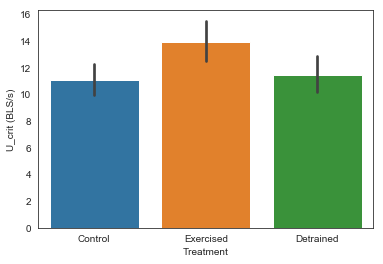

The ANOVA p-value for treatment is 0.011.
There is a statistically significant difference between the treatment groups.


In [9]:
# get the data
figOneData = exercise.parse('Ucrit', skiprows=3, skipfooter=73, usecols=2) # skip first 3 rows, last 73 rows, use col 0, 1 & 2
figOneM = pd.melt(figOneData) # long format data
# create the figure
sns.barplot(x='variable', y='value', data=figOneM)
plt.xlabel('Treatment')
plt.ylabel('U_crit (BLS/s)')
plt.show()

# do the ANOVA
anova = stats.f_oneway(figOneData['Control'], figOneData['Exercised'], figOneData['Detrained'])
print('The ANOVA p-value for treatment is %.3f.\nThere is a statistically significant difference between the \
treatment groups.' % anova[1])

### Where is the difference?
As an aside (i.e. not part of the question) we probably want to know where the difference is if we've identified that there is a difference with ANOVA; in other words we need some kind of post-hoc test. You could do pairwise $t$-tests and then use the Bonferroni correction but this is throwing the baby out with the bath water. The Bonferroni correction is pretty brutal. A better solution is to use [Tukey's honestly significant difference test](https://en.wikipedia.org/wiki/Tukey's_range_test). The [```statsmodels```](http://statsmodels.sourceforge.net/devel/index.html) library has a function for this test in its' [```.stats.multicomp.pairwise_tukeyhsd```](http://statsmodels.sourceforge.net/devel/generated/statsmodels.stats.multicomp.pairwise_tukeyhsd.html) module. After import you have to supply the following arguments to the function:

* the values
* the groups
* the significance level you're working at (usually 0.05)

The use of the function is illustrated below. The data has been converted from wide to long format so that all the treatments are in one column and all the values are in another column. This makes it easy to pass the required data to the ```pairwise_tukeyhsd``` function.

In [38]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd as tukeyhsd
# melt data so treatments are in one column and values are in one column
figOneM = pd.melt(figOneData)
#figOneM.head() # have we melted correctly?
post_hoc = tukeyhsd(figOneM['value'], figOneM['variable'], 0.05) # apply tukey HSD
print(post_hoc)

Multiple Comparison of Means - Tukey HSD,FWER=0.05
  group1    group2  meandiff  lower  upper  reject
--------------------------------------------------
 Control  Detrained  0.3926  -1.9931 2.7783 False 
 Control  Exercised  2.8617   0.476  5.2474  True 
Detrained Exercised  2.4692   0.0835 4.8549  True 
--------------------------------------------------


We can look at this table in two different ways. Firstly the ```reject``` column tells us whether or not to reject our **null hypothesis** that there is no difference between the groups. We see that we do not reject the null hypothesis for the control v detrained comparison (i.e. we cannot say there is a significant difference between these groups) but we can reject the null hypothesis for the control v exercised and exercised v detrained comparisons.

Secondly we can look at the 95% CI for the estimate of the mean difference. If the 95% CI includes zero then the mean difference is plausibly zero i.e. there is plausibly no mean difference. If the 95% CI does not include zero then the means must be different. You can see, in the table above, that the 95% CI values reflect the ```reject``` decision.

Below we collect and plot the data for fig 2a.

In [10]:
# fig 2a
# latency data
latencyData = exercise.parse('latency and exploration', skiprows=3, skipfooter=57, usecols=2)
latencyM = pd.melt(latencyData)
latencyTrials = exercise.parse('latency and exploration', skiprows=3, skipfooter=48, usecols=(9,10))
# exercise data
exerciseData = exercise.parse('latency and exploration', skiprows=3, skipfooter=57, usecols=(4,5,6))
exerciseTrials = exercise.parse('latency and exploration', skiprows=3, skipfooter=48, usecols=(11,12))
exerciseM = pd.melt(exerciseData)

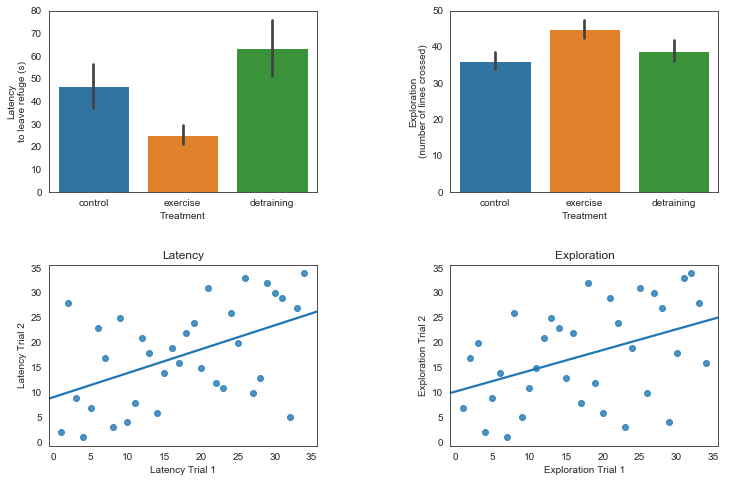

In [11]:
fig = plt.figure(figsize=(12,8))

plt.subplot(2,2,1)
sns.barplot(x='variable', y='value', ci=68, data=latencyM)
plt.xlabel('Treatment')
plt.ylabel('Latency\nto leave refuge (s)')

plt.subplot(2,2,2)
sns.barplot(x='variable', y='value', ci=68, data=exerciseM)
plt.xlabel('Treatment')
plt.ylabel('Exploration\n(number of lines crossed)')

plt.subplot(2,2,3)
sns.regplot(x='Day 0', y='Day 27', data=latencyTrials, ci=None)
plt.title('Latency')
plt.xlabel('Latency Trial 1')
plt.ylabel('Latency Trial 2')

plt.subplot(2,2,4)
sns.regplot(x='Day 0', y='Day 27', data=exerciseTrials, ci=None)
plt.title('Exploration')
plt.xlabel('Exploration Trial 1')
plt.ylabel('Exploration Trial 2')

fig.subplots_adjust(hspace=0.4, wspace=0.5)
plt.show()